In [1]:
library(xts)
library(ggplot2)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [2]:
gdp <- read.csv("GDP.csv")[,c(2,3,5,10,17)]
head(subset(gdp, SUBJECT == "B1_GE" & Period == "Q3-2020" & MEASURE == "GYSA"))

,Country,SUBJECT,MEASURE,Period,Value
18,Australia,B1_GE,GYSA,Q3-2020,-3.824645
36,Austria,B1_GE,GYSA,Q3-2020,-4.242701
54,Belgium,B1_GE,GYSA,Q3-2020,-4.507615
72,Canada,B1_GE,GYSA,Q3-2020,-5.162351
90,Czech Republic,B1_GE,GYSA,Q3-2020,-4.965732
108,Denmark,B1_GE,GYSA,Q3-2020,-4.043810


In [3]:
Q1_2019_GDP_YoY <- subset(gdp, SUBJECT == "B1_GE" & Period == "Q1-2019" & MEASURE == "GYSA")
Q2_2019_GDP_YoY <- subset(gdp, SUBJECT == "B1_GE" & Period == "Q2-2019" & MEASURE == "GYSA")
Q3_2019_GDP_YoY <- subset(gdp, SUBJECT == "B1_GE" & Period == "Q3-2019" & MEASURE == "GYSA")
Q4_2019_GDP_YoY <- subset(gdp, SUBJECT == "B1_GE" & Period == "Q4-2019" & MEASURE == "GYSA")
Q1_2020_GDP_YoY <- subset(gdp, SUBJECT == "B1_GE" & Period == "Q1-2020" & MEASURE == "GYSA")
Q2_2020_GDP_YoY <- subset(gdp, SUBJECT == "B1_GE" & Period == "Q2-2020" & MEASURE == "GYSA")
Q3_2020_GDP_YoY <- subset(gdp, SUBJECT == "B1_GE" & Period == "Q3-2020" & MEASURE == "GYSA")

In [4]:
Q1_2019_GDP_YoY <- Q1_2019_GDP_YoY[,c(1,5)]
colnames(Q1_2019_GDP_YoY) <- c("Country","Q1_2019")
Q2_2019_GDP_YoY <- Q2_2019_GDP_YoY[,c(1,5)]
colnames(Q2_2019_GDP_YoY) <- c("Country","Q2_2019")
Q3_2019_GDP_YoY <- Q3_2019_GDP_YoY[,c(1,5)]
colnames(Q3_2019_GDP_YoY) <- c("Country","Q3_2019")
Q4_2019_GDP_YoY <- Q4_2019_GDP_YoY[,c(1,5)]
colnames(Q4_2019_GDP_YoY) <- c("Country","Q4_2019")
Q1_2020_GDP_YoY <- Q1_2020_GDP_YoY[,c(1,5)]
colnames(Q1_2020_GDP_YoY) <- c("Country","Q1_2020")
Q2_2020_GDP_YoY <- Q2_2020_GDP_YoY[,c(1,5)]
colnames(Q2_2020_GDP_YoY) <- c("Country","Q2_2020")
Q3_2020_GDP_YoY <- Q3_2020_GDP_YoY[,c(1,5)]
colnames(Q3_2020_GDP_YoY) <- c("Country","Q3_2020")

In [5]:
GDP_SET <- merge(Q1_2019_GDP_YoY, Q2_2019_GDP_YoY, by = "Country")
GDP_SET <- merge(GDP_SET, Q3_2019_GDP_YoY, by = "Country")
GDP_SET <- merge(GDP_SET, Q4_2019_GDP_YoY, by = "Country")
GDP_SET <- merge(GDP_SET, Q1_2020_GDP_YoY, by = "Country")
GDP_SET_2Q <- merge(GDP_SET, Q2_2020_GDP_YoY, by = "Country")
GDP_SET_3Q <- merge(GDP_SET_2Q, Q3_2020_GDP_YoY, by = "Country")

In [6]:
write.csv(GDP_SET_2Q, "GDP_2Q.csv")
write.csv(GDP_SET_3Q, "GDP_3Q.csv")

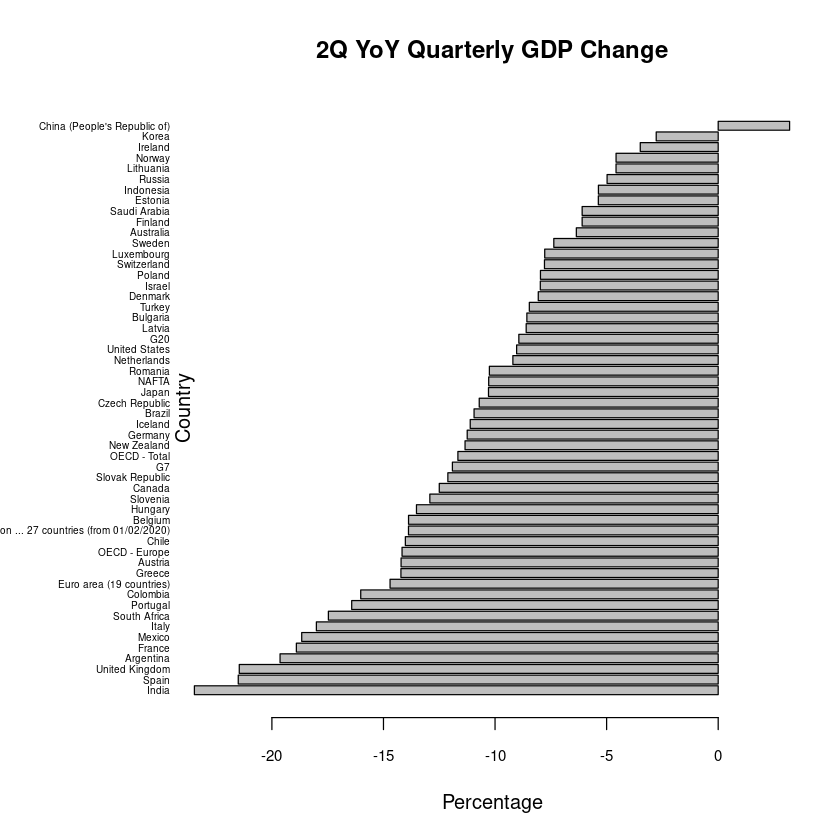

In [7]:
par(mar = c(5, 8, 4, 2) + 0.1)
barplot(height = GDP_SET_2Q[order(GDP_SET_2Q[,"Q2_2020"]),][,"Q2_2020"],
        names = GDP_SET_2Q[order(GDP_SET_2Q[,"Q2_2020"]),][,"Country"],
        horiz=T ,las=1, cex.names=.5, cex.axis=.75, 
        main="2Q YoY Quarterly GDP Change",
        xlab="Percentage",
        ylab="")
mtext("Country",side=2)

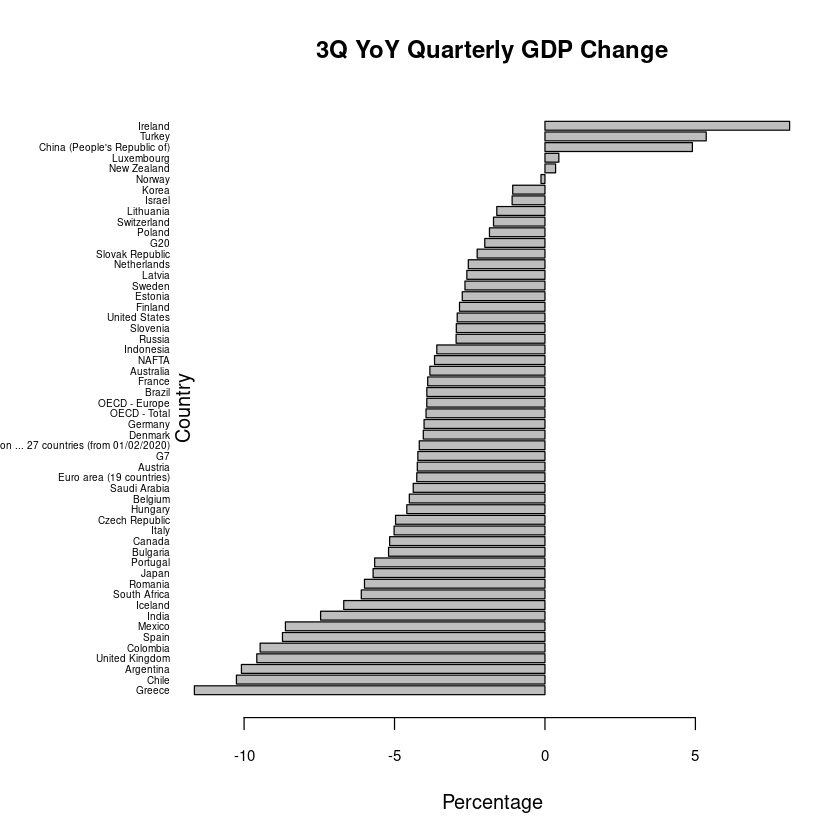

In [8]:
par(mar = c(5, 8, 4, 2) + 0.1)
barplot(height = GDP_SET_3Q[order(GDP_SET_3Q[,"Q3_2020"]),][,"Q3_2020"],
        names = GDP_SET_3Q[order(GDP_SET_3Q[,"Q3_2020"]),][,"Country"],
        horiz=T ,las=1, cex.names=.5, cex.axis=.75,
        main="3Q YoY Quarterly GDP Change",
        xlab="Percentage", 
        ylab="")
mtext("Country",side=2)

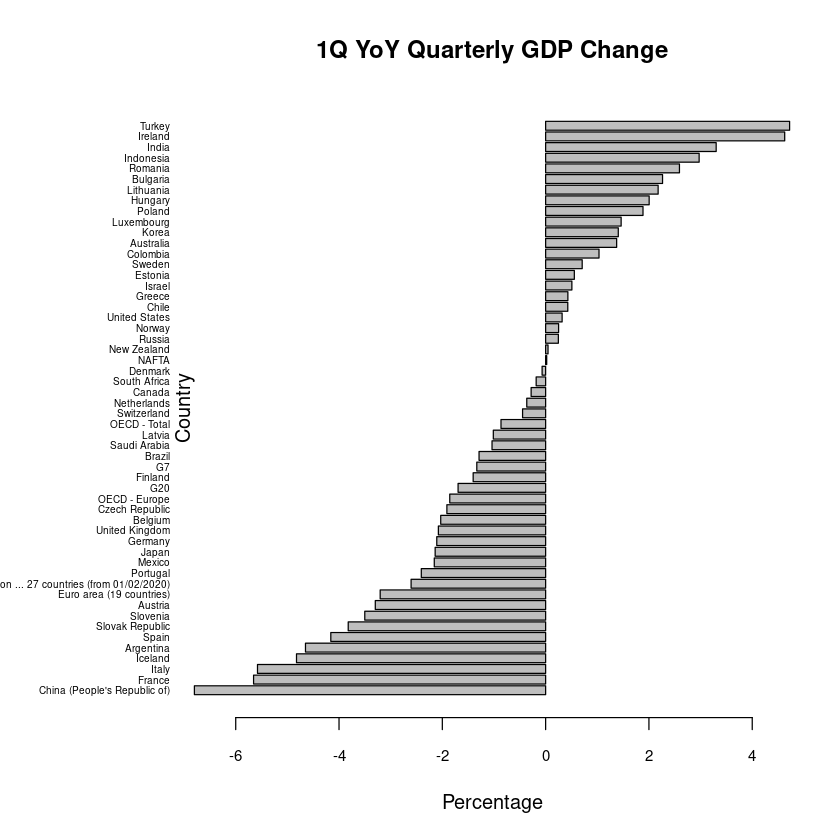

In [11]:
par(mar = c(5, 8, 4, 2) + 0.1)
barplot(height = GDP_SET_2Q[order(GDP_SET_2Q[,"Q1_2020"]),][,"Q1_2020"],
        names = GDP_SET_2Q[order(GDP_SET_2Q[,"Q1_2020"]),][,"Country"],
        horiz=T ,las=1, cex.names=.5, cex.axis=.75, 
        main="1Q YoY Quarterly GDP Change",
        xlab="Percentage",
        ylab="")
mtext("Country",side=2)